<a href="https://colab.research.google.com/github/EduardoRocha1/Teste-Nodejs/blob/master/AtividadeDiamante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
 
%matplotlib inline
 
 
np.random.seed(123)

In [ ]:
[]

In [7]:
df = pd.read_csv('https://github.com/storopoli/ciencia-de-dados/raw/master/notebooks/data/diamonds.csv',
                 index_col=0,
                 dtype=({'carat': float}))

In [8]:
df.dtypes


carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [ ]:
mean_price_cut  = df[['cut','price']].groupby(by=['cut']).mean()
median_price_cut = df[['cut','price']].groupby(by=['cut']).median()
mean_carat_color = df[['color','carat']].groupby(by=['color']).mean()
median_carat_color = df[['color','carat']].groupby(by=['color']).median()


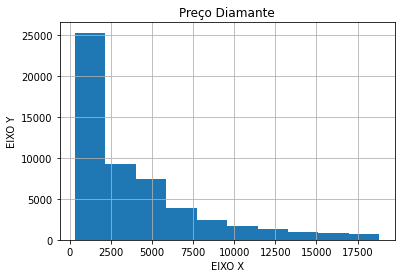

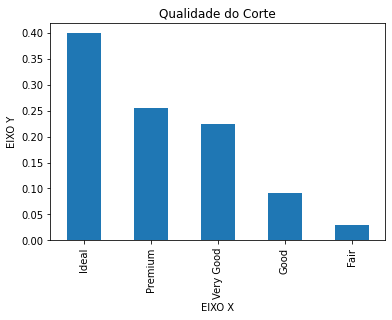

In [13]:
df.hist('price')
plt.title('Preço Diamante')
plt.xlabel('EIXO X')
plt.ylabel('EIXO Y')
plt.show()

df['cut'].value_counts(normalize=True).plot(kind='bar')
plt.title('Qualidade do Corte')
plt.xlabel('EIXO X')
plt.ylabel('EIXO Y')
plt.show()


In [14]:

df_final = pd.get_dummies(df, columns=['cut', 'color', 'clarity'])

X =  df_final.drop(columns=['price'])
y =  df_final['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [35]:
clf = LinearRegression()
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
mae_train = mean_absolute_error(y_pred_train, y_train)

y_pred_test = clf.predict(X_test)
mae_test = mean_absolute_error(y_pred_test, y_test)

print(f"MAE Treino: {mae_train}")
print(f"MAE Teste: {mae_test}")

print(mean_price_cut)
print(median_price_cut)
print(median_carat_color,"\n")

print(mean_absolute_error)

MAE Treino: 742.0239384190813
MAE Teste: 741.9710443664076
                 price
cut                   
Fair       4358.757764
Good       3928.864452
Ideal      3457.541970
Premium    4584.257704
Very Good  3981.759891
            price
cut              
Fair       3282.0
Good       3050.5
Ideal      1810.0
Premium    3185.0
Very Good  2648.0
       carat
color       
D       0.53
E       0.53
F       0.70
G       0.70
H       0.90
I       1.00
J       1.11 

<function mean_absolute_error at 0x7ffb2794d1e0>


In [36]:
from numpy.testing import assert_approx_equal

# Groupbys
assert_approx_equal(mean_price_cut['Good'], 3928.8644)
assert_approx_equal(median_price_cut['Fair'], 3282)
assert_approx_equal(mean_carat_color['D'], 0.657794833)
assert_approx_equal(median_carat_color['H'], 0.9)

# MAEs
assert_approx_equal(mae_train, 739.279089)
assert_approx_equal(mae_test, 742.526558)

KeyError: ignored